<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,43.314347,91.920592,75.636464,59.777975,0.008634,280.658014,280.645026,0.012988
1,0.0,1.0,58.949385,42.753266,63.975063,33.136916,0.011857,208.826488,208.817536,0.008952
2,0.0,2.0,87.400950,56.322942,43.909235,61.922103,-0.009017,259.546213,259.557141,-0.010928
3,0.0,3.0,75.285691,38.316197,77.475874,51.958949,-0.015351,253.021359,253.039917,-0.018558
4,0.0,4.0,64.215525,69.647338,50.788257,55.961951,-0.005008,250.608064,250.613115,-0.005051
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,64.076550,46.133206,84.198406,43.651847,-0.010395,248.049613,248.064104,-0.014491
29996,999.0,26.0,70.787784,85.993024,38.400165,28.235046,0.003125,233.419143,233.422266,-0.003123
29997,999.0,27.0,72.774557,58.258519,99.014996,21.128651,0.003461,261.180183,261.184052,-0.003869
29998,999.0,28.0,41.014063,88.436049,63.382534,46.754535,-0.003924,249.583257,249.586333,-0.003076


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    43.314347  91.920592  75.636464  59.777975  0.008634  280.658014   
      1.0    58.949385  42.753266  63.975063  33.136916  0.011857  208.826488   
      2.0    87.400950  56.322942  43.909235  61.922103 -0.009017  259.546213   
      3.0    75.285691  38.316197  77.475874  51.958949 -0.015351  253.021359   
      4.0    64.215525  69.647338  50.788257  55.961951 -0.005008  250.608064   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   64.076550  46.133206  84.198406  43.651847 -0.010395  248.049613   
      26.0   70.787784  85.993024  38.400165  28.235046  0.003125  233.419143   
      27.0   72.774557  58.258519  99.014996  21.128651  0.003461  261.180183   
      28.0   41.014063  88.436049  63.382534  46.754535 -0.003924  249.583257   
      29.0   24.341510  35.716081  71.550499  86.554775  0.012934  228.175798   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    280.645026  0.012988  
      1.0    208.817536  0.008952  
      2.0    259.557141 -0.010928  
      3.0    253.039917 -0.018558  
      4.0    250.613115 -0.005051  
...                 ...       ...  
999.0 25.0   248.064104 -0.014491  
      26.0   233.422266 -0.003123  
      27.0   261.184052 -0.003869  
      28.0   249.586333 -0.003076  
      29.0   228.157400  0.018399  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    43.314347  91.920592  75.636464  59.777975  0.008634  280.658014   
      1.0    58.949385  42.753266  63.975063  33.136916  0.011857  208.826488   
      2.0    87.400950  56.322942  43.909235  61.922103 -0.009017  259.546213   
      3.0    75.285691  38.316197  77.475874  51.958949 -0.015351  253.021359   
      4.0    64.215525  69.647338  50.788257  55.961951 -0.005008  250.608064   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   64.076550  46.133206  84.198406  43.651847 -0.010395  248.049613   
      26.0   70.787784  85.993024  38.400165  28.235046  0.003125  233.419143   
      27.0   72.774557  58.258519  99.014996  21.128651  0.003461  261.180183   
      28.0   41.014063  88.436049  63.382534  46.754535 -0.003924  249.583257   
      29.0   24.341510  35.716081  71.550499  86.554775  0.012934  228.175798   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    280.645026  0.012988  
      1.0    208.817536  0.008952  
      2.0    259.557141 -0.010928  
      3.0    253.039917 -0.018558  
      4.0    250.613115 -0.005051  
...                 ...       ...  
999.0 25.0   248.064104 -0.014491  
      26.0   233.422266 -0.003123  
      27.0   261.184052 -0.003869  
      28.0   249.586333 -0.003076  
      29.0   228.157400  0.018399  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,43.314347,91.920592,75.636464,59.777975,0.008634,280.658014,280.645026,0.012988
1,0.0,1.0,58.949385,42.753266,63.975063,33.136916,0.011857,208.826488,208.817536,0.008952
2,0.0,2.0,87.400950,56.322942,43.909235,61.922103,-0.009017,259.546213,259.557141,-0.010928
3,0.0,3.0,75.285691,38.316197,77.475874,51.958949,-0.015351,253.021359,253.039917,-0.018558
4,0.0,4.0,64.215525,69.647338,50.788257,55.961951,-0.005008,250.608064,250.613115,-0.005051
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,64.076550,46.133206,84.198406,43.651847,-0.010395,248.049613,248.064104,-0.014491
29996,999.0,26.0,70.787784,85.993024,38.400165,28.235046,0.003125,233.419143,233.422266,-0.003123
29997,999.0,27.0,72.774557,58.258519,99.014996,21.128651,0.003461,261.180183,261.184052,-0.003869
29998,999.0,28.0,41.014063,88.436049,63.382534,46.754535,-0.003924,249.583257,249.586333,-0.003076


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    43.314347  91.920592  75.636464  59.777975  0.008634  280.658014   
      1.0    58.949385  42.753266  63.975063  33.136916  0.011857  208.826488   
      2.0    87.400950  56.322942  43.909235  61.922103 -0.009017  259.546213   
      3.0    75.285691  38.316197  77.475874  51.958949 -0.015351  253.021359   
      4.0    64.215525  69.647338  50.788257  55.961951 -0.005008  250.608064   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   64.076550  46.133206  84.198406  43.651847 -0.010395  248.049613   
      26.0   70.787784  85.993024  38.400165  28.235046  0.003125  233.419143   
      27.0   72.774557  58.258519  99.014996  21.128651  0.003461  261.180183   
      28.0   41.014063  88.436049  63.382534  46.754535 -0.003924  249.583257   
      29.0   24.341510  35.716081  71.550499  86.554775  0.012934  228.175798   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    280.645026  0.012988  
      1.0    208.817536  0.008952  
      2.0    259.557141 -0.010928  
      3.0    253.039917 -0.018558  
      4.0    250.613115 -0.005051  
...                 ...       ...  
999.0 25.0   248.064104 -0.014491  
      26.0   233.422266 -0.003123  
      27.0   261.184052 -0.003869  
      28.0   249.586333 -0.003076  
      29.0   228.157400  0.018399  

[30000 rows x 8 columns]

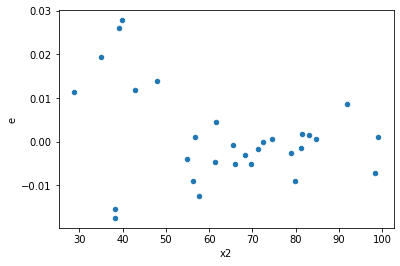

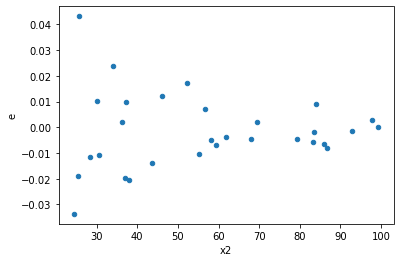

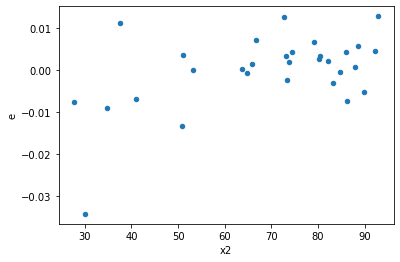

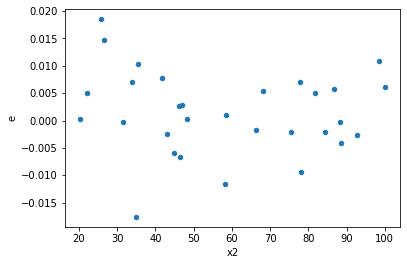

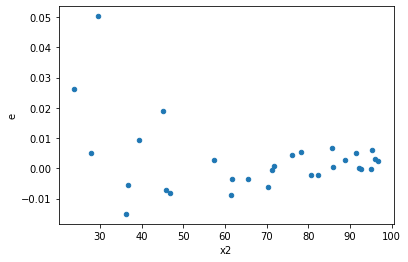

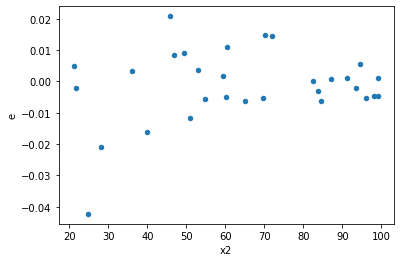

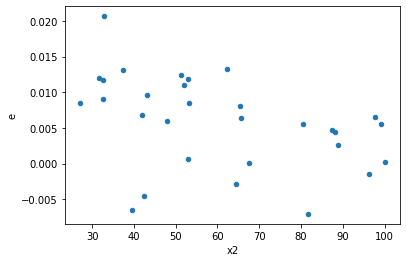

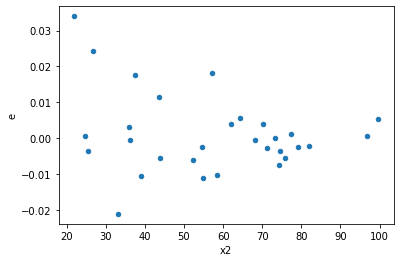

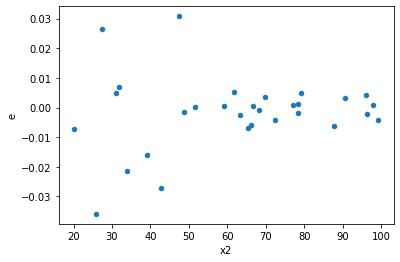

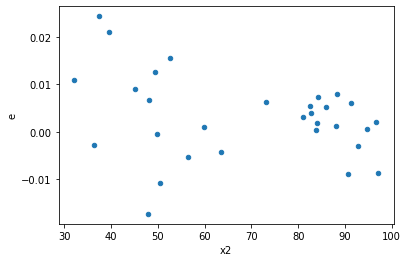

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,10.0,12.0,0.00044222806055052675,0.0008502262049773263,4.422280605505267e-05,7.085218374811052e-05,1.602163907462297,0.4345587314730046,0.7827206342634977,0.2172793657365023,Reject001=1 : Homoscedasticity
5.0,10.0,12.0,0.0006235788497188187,0.002188514636179806,6.235788497188187e-05,0.0001823762196816505,2.924669747280344,0.08201763395124595,0.958991183024377,0.041008816975622975,Reject001=1 : Homoscedasticity
6.0,11.0,11.0,0.00031319252989777833,0.0003776625075584143,2.8472048172525303e-05,3.433295523258312e-05,1.2058477502055305,0.7617175894546193,0.6191412052726903,0.38085879472730966,Reject001=1 : Homoscedasticity
9.0,6.0,16.0,0.0002545147519031766,0.0009174039695067222,4.24191253171961e-05,5.733774809417014e-05,1.3516956718323996,0.5841169263903674,0.7079415368048163,0.2920584631951837,Reject001=1 : Homoscedasticity
11.0,14.0,8.0,0.0031327668641511243,0.0018878688469595476,0.0002237690617250803,0.00023598360586994346,1.0545854911787125,0.9801053930237509,0.5099473034881246,0.49005269651187544,Reject001=1 : Homoscedasticity
12.0,13.0,9.0,0.0010949730646289482,0.0018201452400339842,8.422869727914986e-05,0.00020223836000377601,2.4010624233391593,0.19216969384288474,0.9039151530785576,0.09608484692144237,Reject001=1 : Homoscedasticity
14.0,12.0,10.0,0.0005085424660643966,0.0006175548966968911,4.237853883869971e-05,6.175548966968911e-05,1.4572349911529874,0.5591093917648258,0.7204453041175871,0.2795546958824129,Reject001=1 : Homoscedasticity
16.0,9.0,13.0,0.0006112503126046766,0.0015208427659438963,6.791670140051962e-05,0.0001169879050726074,1.7225204207534195,0.36110161556818055,0.8194491922159097,0.18055080778409027,Reject001=1 : Homoscedasticity
17.0,9.0,13.0,0.0003753049281436647,0.001224691254613835,4.1700547571518304e-05,9.420701958567961e-05,2.2591314760102454,0.17672402746207783,0.9116379862689611,0.08836201373103891,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,10.0,0.0022096118134180102,0.0001817699932223633,0.0001841343177848342,1.817699932223633e-05,0.09871597831902597,0.00040565756708500777,Reject001=0 : Heteroscedasticity
1.0,11.0,11.0,0.003189215449320869,0.0007766557141204752,0.0002899286772109881,7.06050649200432e-05,0.2435256339567341,0.02737870300251081,Reject001=1 : Homoscedasticity
2.0,10.0,12.0,0.00044222806055052675,0.0008502262049773263,4.422280605505267e-05,7.085218374811052e-05,1.602163907462297,0.4345587314730046,Reject001=1 : Homoscedasticity
3.0,11.0,11.0,0.0007110521079505091,0.0005023951449897656,6.464110072277355e-05,4.567228590816051e-05,0.7065517975016445,0.574299856611466,Reject001=1 : Homoscedasticity
4.0,6.0,16.0,0.0006022842948387156,0.0010512034071235462,0.0001003807158064526,6.570021294522163e-05,0.6545103052652105,0.6267490497470314,Reject001=1 : Homoscedasticity
5.0,10.0,12.0,0.0006235788497188187,0.002188514636179806,6.235788497188187e-05,0.0001823762196816505,2.924669747280344,0.08201763395124595,Reject001=1 : Homoscedasticity
6.0,11.0,11.0,0.00031319252989777833,0.0003776625075584143,2.8472048172525303e-05,3.433295523258312e-05,1.2058477502055305,0.7617175894546193,Reject001=1 : Homoscedasticity
7.0,18.0,4.0,0.002317496170650717,0.00016874890880502308,0.00012874978725837318,4.218722720125577e-05,0.3276683255141623,0.08784137911148923,Reject001=1 : Homoscedasticity
8.0,8.0,14.0,0.00144006552264818,0.0012252138265368907,0.0001800081903310225,8.751527332406362e-05,0.4861738411076137,0.3070075934332126,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      759
Reject001=0 : Heteroscedasticity    241
Name: Result_test, dtype: int64